In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 3
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((524, 12, 1), (524,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT3/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2077 - root_mean_squared_error: 0.4558

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 9s 105ms/step - loss: 0.2067 - root_mean_squared_error: 0.4546 - val_loss: 0.2186 - val_root_mean_squared_error: 0.4676
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1571 - root_mean_squared_error: 0.3964

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.1532 - root_mean_squared_error: 0.3914 - val_loss: 0.1700 - val_root_mean_squared_error: 0.4123
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.1144 - root_mean_squared_error: 0.3382

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.1137 - root_mean_squared_error: 0.3372 - val_loss: 0.1352 - val_root_mean_squared_error: 0.3678
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0915 - root_mean_squared_error: 0.3024

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0879 - root_mean_squared_error: 0.2965 - val_loss: 0.1095 - val_root_mean_squared_error: 0.3309
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2664

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.0710 - root_mean_squared_error: 0.2664 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3032
Epoch 6/50
52/53 [============================>.] - ETA: 0s - loss: 0.0507 - root_mean_squared_error: 0.2251

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0513 - root_mean_squared_error: 0.2265 - val_loss: 0.0785 - val_root_mean_squared_error: 0.2801
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0406 - root_mean_squared_error: 0.2014

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0397 - root_mean_squared_error: 0.1992 - val_loss: 0.0626 - val_root_mean_squared_error: 0.2502
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0308 - root_mean_squared_error: 0.1756

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0290 - root_mean_squared_error: 0.1702 - val_loss: 0.0529 - val_root_mean_squared_error: 0.2300
Epoch 9/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1626

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0252 - root_mean_squared_error: 0.1588 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1966
Epoch 10/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0201 - root_mean_squared_error: 0.1418

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0205 - root_mean_squared_error: 0.1431 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733
Epoch 11/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1307

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0183 - root_mean_squared_error: 0.1353 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 12/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1210

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1142

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1134

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0138 - root_mean_squared_error: 0.1177 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 15/50
52/53 [============================>.] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1252

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 16/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.1062

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0118 - root_mean_squared_error: 0.1084 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0548
Epoch 17/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1186

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 18/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0109 - root_mean_squared_error: 0.1046

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0624
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0552
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0151 - root_mean_squared_error: 0.1229 - val_loss: 0.0038 - val_root_mean_square

INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


INFO:tensorflow:Assets written to: Baffin_model_LT3\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0521
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0136 - root_mean_squared_error: 0.1168 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 46/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0114 - root_mean_squared_error: 0.1069 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1168
Epoch 47/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 48/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 49/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0027 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8854674816131591 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

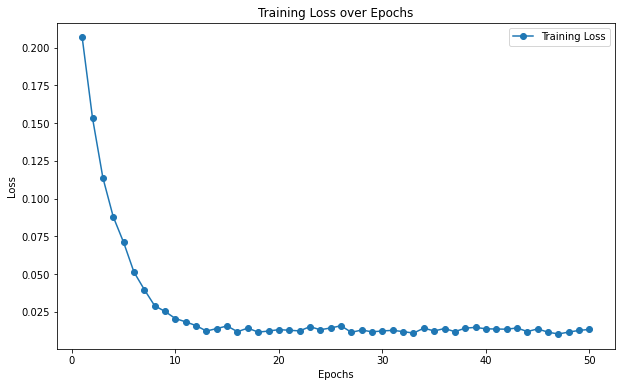

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

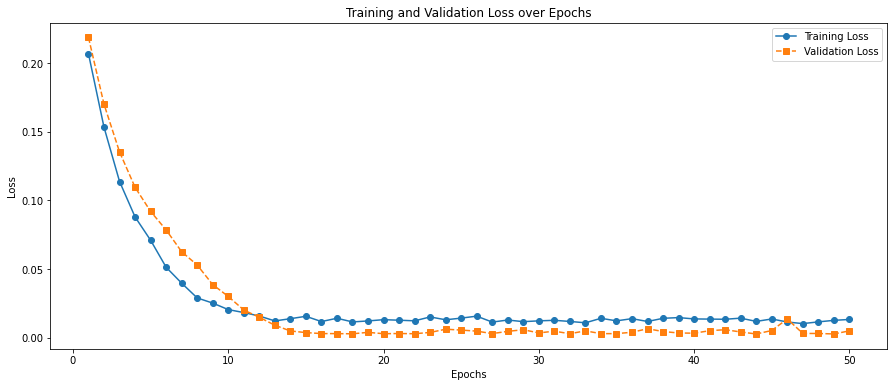

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT3/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.06560016488723969


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.053011064202942014


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

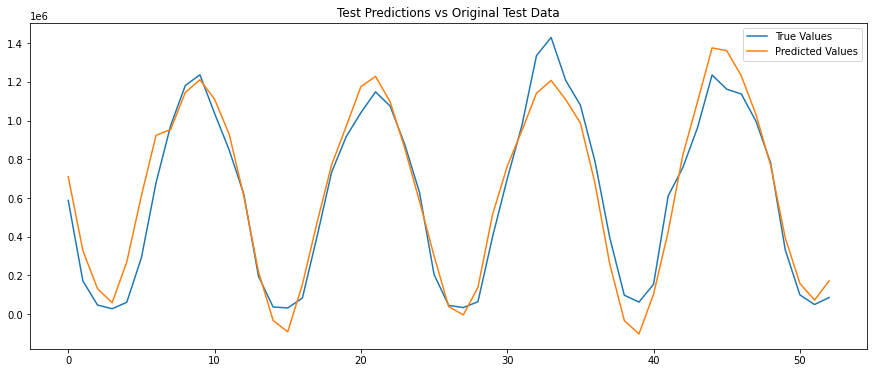

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.003665038664025502


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.04852379719568415


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

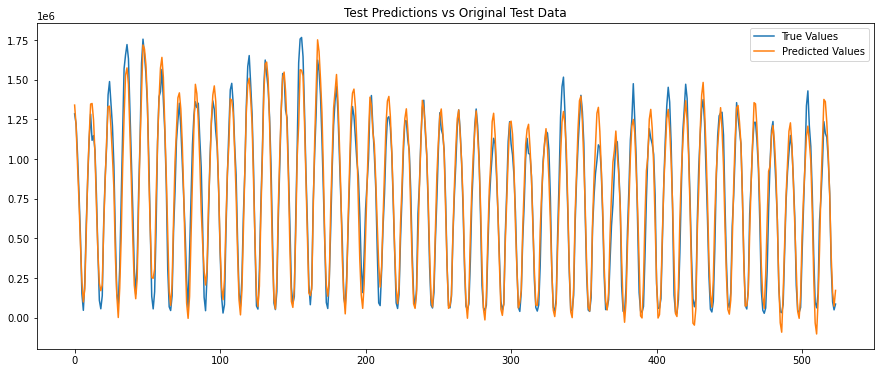

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()